In [333]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import cross_validate, cross_val_score
import matplotlib.pyplot as plt

In [334]:
#Load data frame
df = pd.read_csv('CCPP_data.csv')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [335]:
# Normalize data in two ways
df_normalize_min_max = df.copy()
df_normalize_max_abs = df.copy()
MinMaxScaler(feature_range=(0,100),copy=False).fit_transform(df_normalize_min_max)
MaxAbsScaler(copy=False).fit_transform(df_normalize_max_abs)
df_normalize_min_max


,AT,V,AP,RH,PE
0,37.252125,29.181495,77.159119,63.820375,56.953642
1,66.203966,66.903915,67.186340,44.932976,31.933775
2,9.348442,24.982206,47.686216,89.249330,90.463576
3,53.966006,56.868327,42.934917,68.471850,34.728477
4,25.524079,21.601423,40.435536,95.254692,71.046358
...,...,...,...,...,...
9563,42.039660,43.291815,52.264291,87.721180,52.675497
9564,32.237960,24.590747,76.169265,55.254692,65.377483
9565,83.597734,87.135231,49.566939,14.638070,12.331126
9566,64.220963,78.451957,51.893096,49.369973,20.503311


In [336]:
# Split the targeted feature
df_output_min_max = df_normalize_min_max['PE']
df_output_max_abs = df_normalize_max_abs['PE']
df_normalize_min_max.drop('PE', inplace=True, axis=1)
df_normalize_max_abs.drop('PE', inplace=True, axis=1)

In [337]:
df_normalize_max_abs

,AT,V,AP,RH
0,0.403126,0.512016,0.991067,0.730531
1,0.678523,0.771947,0.987167,0.589856
2,0.137699,0.483080,0.979541,0.919928
3,0.562113,0.702795,0.977683,0.765176
4,0.291566,0.459784,0.976706,0.964657
...,...,...,...,...
9563,0.448666,0.609245,0.981332,0.908546
9564,0.355430,0.480383,0.990680,0.666733
9565,0.843977,0.911354,0.980277,0.364217
9566,0.659660,0.851520,0.981186,0.622903


In [338]:
# We create our models
linear = LinearRegression()

In [339]:
# We split our data
x_train_minmax, x_test_minmax, y_train_minmax, y_test_minmax = train_test_split(df_normalize_min_max, df_output_min_max ,test_size=0.2)
x_train_maxabs, x_test_maxabs, y_train_maxabs, y_test_maxabs = train_test_split(df_normalize_max_abs, df_output_max_abs ,test_size=0.2)


In [340]:
# We try our linear model
linear.fit(x_train_minmax, y_train_minmax)

y_l_min_max = linear.predict(x_test_minmax)


In [341]:
linear_scores = cross_validate(linear, x_test_minmax, y_test_minmax, cv=4, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])
linear_score = cross_val_score(linear, x_test_minmax, y_test_minmax, cv=4)
print('Mean squared error from all 4 validations',abs(linear_scores['test_neg_mean_squared_error']))
print('Mean absolute error from all 4 validations',abs(linear_scores['test_neg_mean_absolute_error']))
print('R2 score from all 4 validations', linear_scores['test_r2'])
print("%0.2f accuracy with a standard deviation of %0.2f" % (linear_score.mean(), linear_score.std()))

Mean squared error from all 4 validations [31.83648201 39.36555656 34.48608364 41.37321267]
Mean absolute error from all 4 validations [4.61682289 4.8434267  4.78342121 4.90495868]
R2 score from all 4 validations [0.9361069  0.91752266 0.93521511 0.92382761]
0.93 accuracy with a standard deviation of 0.01


<BarContainer object of 1914 artists>

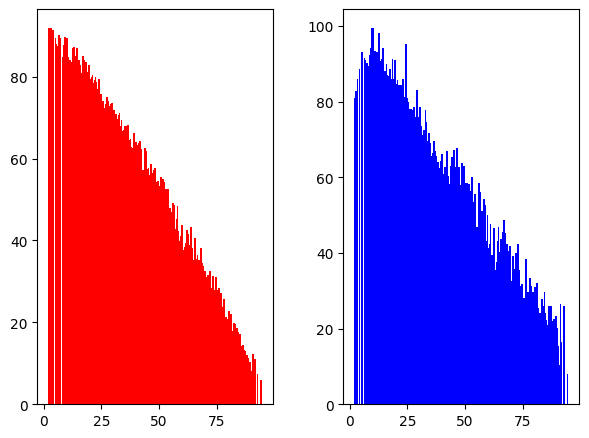

In [342]:
fig, axs = plt.subplots(1,2)
fig.tight_layout(pad=2)
axs[0].bar(x_test_minmax['AT'], y_l_min_max, color='red')
axs[1].bar(x_test_minmax['AT'], y_test_minmax, color='blue')

<BarContainer object of 1914 artists>

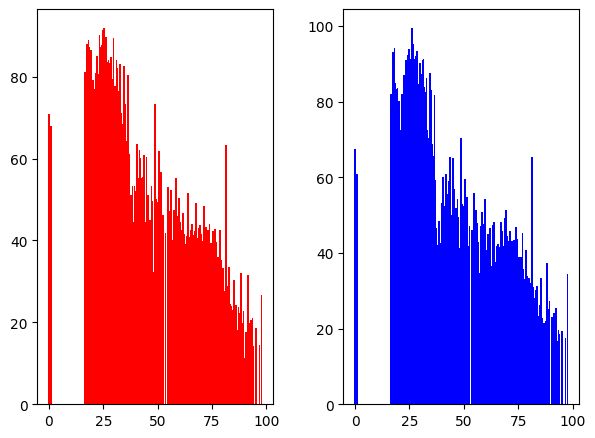

In [343]:
fig, axs = plt.subplots(1,2)
fig.tight_layout(pad=2)
axs[0].bar(x_test_minmax['V'], y_l_min_max, color='red')
axs[1].bar(x_test_minmax['V'], y_test_minmax, color='blue')

<BarContainer object of 1914 artists>

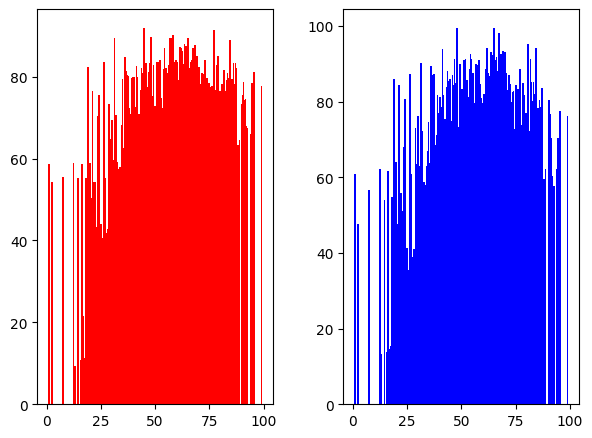

In [344]:
fig, axs = plt.subplots(1,2)
fig.tight_layout(pad=2)
axs[0].bar(x_test_minmax['AP'], y_l_min_max, color='red')
axs[1].bar(x_test_minmax['AP'], y_test_minmax, color='blue')

<BarContainer object of 1914 artists>

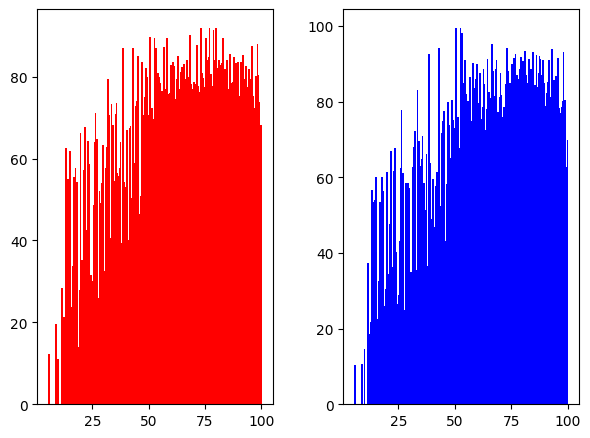

In [345]:
fig, axs = plt.subplots(1,2)
fig.tight_layout(pad=2)
axs[0].bar(x_test_minmax['RH'], y_l_min_max, color='red')
axs[1].bar(x_test_minmax['RH'], y_test_minmax, color='blue')

In [346]:
# We try our decision tree model

tree = DecisionTreeRegressor()
tree1 = DecisionTreeRegressor(criterion='absolute_error')
tree2 = DecisionTreeRegressor(criterion='poisson')

tree3 = DecisionTreeRegressor(min_samples_split=10)
tree4 = DecisionTreeRegressor(criterion='absolute_error', min_samples_split=10)
tree5 = DecisionTreeRegressor(criterion='poisson', min_samples_split=10)


In [347]:
tree.fit(x_train_maxabs, y_train_maxabs)
tree1.fit(x_train_maxabs, y_train_maxabs)
tree2.fit(x_train_maxabs, y_train_maxabs)
tree3.fit(x_train_maxabs, y_train_maxabs)
tree4.fit(x_train_maxabs, y_train_maxabs)
tree5.fit(x_train_maxabs, y_train_maxabs)

DecisionTreeRegressor(criterion='poisson', min_samples_split=10)

In [348]:
y_tree = tree.predict(x_test_maxabs)
y_tree1 =tree1.predict(x_test_maxabs)
y_tree2 =tree2.predict(x_test_maxabs)
y_tree3 =tree3.predict(x_test_maxabs)
y_tree4 =tree4.predict(x_test_maxabs)
y_tree5 =tree5.predict(x_test_maxabs)

In [349]:
tree_cross = cross_val_score(tree, x_test_maxabs, y_test_minmax, cv=4)
tree1_cross = cross_val_score(tree1, x_test_maxabs, y_test_minmax, cv=4)
tree2_cross = cross_val_score(tree2, x_test_maxabs, y_test_minmax, cv=4)
tree3_cross = cross_val_score(tree3, x_test_maxabs, y_test_minmax, cv=4)
tree4_cross = cross_val_score(tree4, x_test_maxabs, y_test_minmax, cv=4)
tree5_cross = cross_val_score(tree5, x_test_maxabs, y_test_minmax, cv=4)

tree_cross_mean = cross_validate(tree, x_test_maxabs, y_test_minmax, cv=4, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'])
tree1_cross_mean = cross_validate(tree1, x_test_maxabs, y_test_minmax, cv=4, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'])
tree2_cross_mean = cross_validate(tree2, x_test_maxabs, y_test_minmax, cv=4, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'])
tree3_cross_mean = cross_validate(tree3, x_test_maxabs, y_test_minmax, cv=4, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'])
tree4_cross_mean = cross_validate(tree4, x_test_maxabs, y_test_minmax, cv=4, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'])
tree5_cross_mean = cross_validate(tree5, x_test_maxabs, y_test_minmax, cv=4, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'])

In [350]:
print('Mean squared error from all 4 validations for tree',abs(tree_cross_mean['test_neg_mean_squared_error']))
print('Mean absolute error from all 4 validations for tree',abs(tree_cross_mean['test_neg_mean_absolute_error']))
print("%0.2f accuracy with a standard deviation of %0.2f for tree\n" % (tree_cross.mean(), tree_cross.std()))

print('Mean squared error from all 4 validations for tree1',abs(tree1_cross_mean['test_neg_mean_squared_error']))
print('Mean absolute error from all 4 validations for tree1',abs(tree1_cross_mean['test_neg_mean_absolute_error']))
print("%0.2f accuracy with a standard deviation of %0.2f for tree1\n" % (tree1_cross.mean(), tree1_cross.std()))

print('Mean squared error from all 4 validations for tree2',abs(tree2_cross_mean['test_neg_mean_squared_error']))
print('Mean absolute error from all 4 validations for tree2',abs(tree2_cross_mean['test_neg_mean_absolute_error']))
print("%0.2f accuracy with a standard deviation of %0.2f for tree2\n" % (tree2_cross.mean(), tree2_cross.std()))

print('Mean squared error from all 4 validations for tree3',abs(tree3_cross_mean['test_neg_mean_squared_error']))
print('Mean absolute error from all 4 validations for tree3',abs(tree3_cross_mean['test_neg_mean_absolute_error']))
print("%0.2f accuracy with a standard deviation of %0.2f for tree3\n" % (tree3_cross.mean(), tree3_cross.std()))

print('Mean squared error from all 4 validations for tree4',abs(tree4_cross_mean['test_neg_mean_squared_error']))
print('Mean absolute error from all 4 validations for tree4',abs(tree4_cross_mean['test_neg_mean_absolute_error']))
print("%0.2f accuracy with a standard deviation of %0.2f for tree4\n" % (tree4_cross.mean(), tree4_cross.std()))

print('Mean squared error from all 4 validations for tree5',abs(tree5_cross_mean['test_neg_mean_squared_error']))
print('Mean absolute error from all 4 validations for tree5',abs(tree5_cross_mean['test_neg_mean_absolute_error']))
print("%0.2f accuracy with a standard deviation of %0.2f for tree5\n" % (tree5_cross.mean(), tree5_cross.std()))

Mean squared error from all 4 validations for tree [1063.02381456 1030.17535271  988.46750831 1133.60227979]
Mean absolute error from all 4 validations for tree [26.81828865 26.19355998 25.28817645 27.25780709]
-1.09 accuracy with a standard deviation of 0.06 for tree

Mean squared error from all 4 validations for tree1 [1050.3104975   973.09016791 1015.00552369 1080.64184222]
Mean absolute error from all 4 validations for tree1 [26.48398291 24.95444428 25.63293524 26.90808834]
-1.01 accuracy with a standard deviation of 0.07 for tree1

Mean squared error from all 4 validations for tree2 [1073.1759756   986.12591196 1055.62034074 1044.2515837 ]
Mean absolute error from all 4 validations for tree2 [26.39768281 25.26096033 26.33896755 26.541079  ]
-1.08 accuracy with a standard deviation of 0.06 for tree2

Mean squared error from all 4 validations for tree3 [849.7322467  833.95924493 845.4970968  937.18556118]
Mean absolute error from all 4 validations for tree3 [23.89480893 23.10769053 